In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_data(name, paths):
    data = [np.load(p) for p in paths]
    train = np.array([d['train'] for d in data])
    val = np.array([d['val'] for d in data])
    test = np.array([d['test'] for d in data])
    return {
        'name': name,
        'train_mean': train.mean(axis=0),
        'train_std': train.std(axis=0),
        'val_mean': val.mean(axis=0),
        'val_std': val.std(axis=0),
        'test_mean': test.mean(),
        'test_std': test.std(),
      }

def print_stats(d):
    print(f"Loss for {d['name']} is {d['test_mean']:.4f}+-{d['test_std']:.4f}")

In [4]:
feat = load_data('RotationGAT (ft+sp)', ['runs/feat_rotations_2d_eigens_42.npz',
                                         'runs/feat_rotations_2d_eigens_43.npz',
                                         'runs/feat_rotations_2d_eigens_44.npz',
                                         ])
print_stats(feat)

Loss for RotationGAT (ft+sp) is 0.2970+-0.0098


In [5]:
rot = load_data('RotationGAT (sp)', ['runs/rotations_2d_eigens_42.npz',
                             'runs/rotations_2d_eigens_43.npz',
                             'runs/rotations_2d_eigens_44.npz',
                             ])
print_stats(rot)

Loss for RotationGAT (sp) is 0.3910+-0.0059


In [6]:
eig = load_data('EigenGAT', ['runs/eigen_gat_2d_eigens_42.npz',
                             'runs/eigen_gat_2d_eigens_43.npz',
                             ])
print_stats(eig)

Loss for EigenGAT is 0.4919+-0.0044


In [7]:
gat = load_data('GAT', ['runs/gat_2d_eigens_42.npz',
                        'runs/gat_2d_eigens_43.npz',
                        'runs/gat_2d_eigens_44.npz',
                        ])
print_stats(gat)

Loss for GAT is 0.4831+-0.0008


In [89]:
mpnn = load_data('MPNN', ['runs/mpnn_2d_eigens_42.npz',
                          'runs/mpnn_2d_eigens_43.npz',
                          'runs/mpnn_2d_eigens_44.npz',
                          ])
print_stats(mpnn)

Loss for MPNN is 0.2981+-0.0054


In [99]:
gin = load_data('GIN', ['runs/gin_2d_eigens_6k_42.npz',
                          'runs/gin_2d_eigens_6k_43.npz',
                          'runs/gin_2d_eigens_6k_44.npz',
                          ])
print_stats(gin)

Loss for GIN is 0.2813+-0.0087


In [100]:
def add_to_plot(ax, d, split):
    NUM_STD_DEV=2
    ax.plot(x, d[f'{split}_mean'], label=d['name'])
    ax.fill_between(x, d[f'{split}_mean']-NUM_STD_DEV*d[f'{split}_std'] ,
                    d[f'{split}_mean']+NUM_STD_DEV*d[f'{split}_std'], alpha=0.2)

def add_to_plot_multi(axs, d, splits):
    for ax, split in zip(axs, splits):
        add_to_plot(ax, d, split)

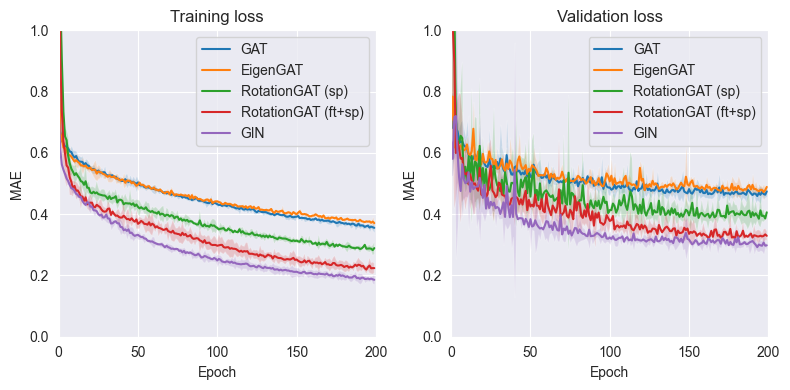

In [102]:
fig, (ax_train, ax_val) = plt.subplots(1,2, figsize=(8,4))

x = np.arange(0, 200)

add_to_plot_multi([ax_train, ax_val], gat, ['train', 'val'])
add_to_plot_multi([ax_train, ax_val], eig, ['train', 'val'])
add_to_plot_multi([ax_train, ax_val], rot, ['train', 'val'])
add_to_plot_multi([ax_train, ax_val], feat, ['train', 'val'])
#add_to_plot_multi([ax_train, ax_val], mpnn, ['train', 'val'])
add_to_plot_multi([ax_train, ax_val], gin, ['train', 'val'])


ax_train.set_ylim(0, 1)
ax_train.set_xlim(0, 200)
ax_train.set_title('Training loss')
ax_train.legend(loc='best')
ax_train.set_xlabel('Epoch')
ax_train.set_ylabel('MAE')

ax_val.set_ylim(0, 1)
ax_val.set_xlim(0, 200)
ax_val.set_title('Validation loss')
ax_val.legend(loc='best')
ax_val.set_xlabel('Epoch')
ax_val.set_ylabel('MAE')

fig.tight_layout()
fig.savefig('graphics/loss.png', dpi=400)
pass

In [11]:
print_stats(load_data('SAGE', ['runs/sage_2d_walks_42.npz',
                               'runs/sage_2d_walks_43.npz',
                                ]))

Loss for SAGE is 0.4179+-0.0006


In [12]:
print_stats(load_data('3D Feat', ['runs/feat_rotations_3d_walks_42.npz',
                                  'runs/feat_rotations_3d_walks_43.npz',
                                   ]))

Loss for 3D Feat is 0.2881+-0.0073


In [13]:
print_stats(load_data('3D Spec', ['runs/rotations_3d_eigens_42.npz',
                                   'runs/rotations_3d_eigens_43.npz',
                                   'runs/rotations_3d_eigens_44.npz',
                                   ]))

Loss for 3D Spec is 0.3682+-0.0230


In [14]:
print_stats(load_data('RW Spec', ['runs/rotations_2d_walks_42.npz',
                                   'runs/rotations_2d_walks_43.npz',
                                   'runs/rotations_2d_walks_44.npz',
                                   ]))

Loss for RW Spec is 0.3696+-0.0055


In [15]:
print_stats(load_data('RW Feat', ['runs/feat_rotations_2d_walks_42.npz',
                                   'runs/feat_rotations_2d_walks_43.npz',
                                   'runs/feat_rotations_2d_walks_44.npz',
                                   ]))

Loss for RW Feat is 0.3050+-0.0080


In [16]:
var_k = np.array([[
    [[load_data(f'run{f}{e}{k}', [f'runs/{f}rotations_2d_{e}{k}_{seed}.npz' for seed in [42,43,44]])[i] for i in
      ['test_mean', 'test_std']]
    for e in ['eigens', 'walks']] for k in ['_2k','_4k','']] for f in ['feat_', '']])
var_k.shape

(2, 3, 2, 2)

In [87]:
var_k[1,2,1]

array([0.36956215, 0.00552631], dtype=float32)

In [69]:
zero_rot = load_data('rot0', [f'runs/rotations_2d_walks_6k_{s}.npz' for s in [42,43,44]])

In [67]:
zero_feat = load_data('feat0', [f'runs/feat_rotations_2d_walks_6k_{s}.npz' for s in [42,43, 44]])

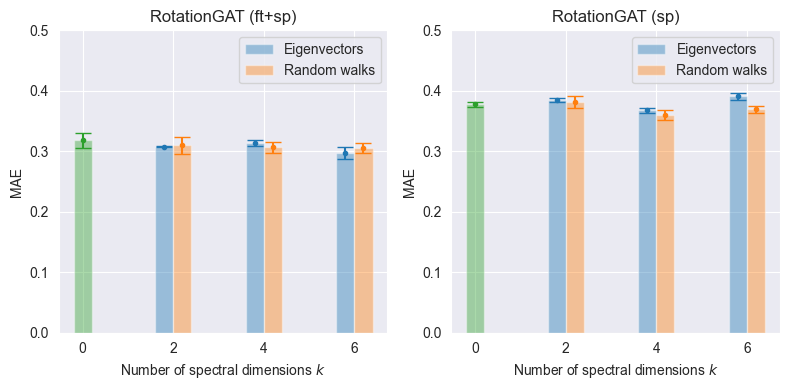

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))

width = 0.4
alpha = 0.4
x = np.array([2,4,6])


ax1.bar(x - width / 2, var_k[0,:,0,0], alpha=alpha, width=width, label='Eigenvectors')
ax1.errorbar(x- width / 2, var_k[0,:,0,0], var_k[0,:,0,1], marker='.', linestyle='None', capsize=6)
ax1.bar(x + width / 2, var_k[0,:,1,0], alpha=alpha, width=width, label='Random walks')
ax1.errorbar(x + width / 2, var_k[0,:,1,0], var_k[0,:,1,1], marker='.', linestyle='None', capsize=6)

ax1.bar(0, zero_feat['test_mean'], width=width, alpha=alpha)
ax1.errorbar(0, zero_feat['test_mean'], zero_feat['test_std'], marker='.', linestyle='None', capsize=6)
ax1.set_title('RotationGAT (ft+sp)')
ax1.set_xlabel('Number of spectral dimensions $k$')
ax1.set_ylabel('MAE')
ax1.set_ylim(0,0.5)


ax2.bar(x - width / 2, var_k[1,:,0,0], alpha=alpha, width=width, label='Eigenvectors')
ax2.errorbar(x- width / 2, var_k[1,:,0,0], var_k[1,:,0,1], marker='.', linestyle='None', capsize=6)
ax2.bar(x + width / 2, var_k[1,:,1,0], alpha=alpha, width=width, label='Random walks')
ax2.errorbar(x + width / 2, var_k[1,:,1,0], var_k[1,:,1,1], marker='.', linestyle='None', capsize=6)

ax2.bar(0, zero_rot['test_mean'], width=width, alpha=alpha)
ax2.errorbar(0, zero_rot['test_mean'], zero_rot['test_std'], marker='.', linestyle='None', capsize=6)
ax2.set_title('RotationGAT (sp)')
ax2.set_xlabel('Number of spectral dimensions $k$')
ax2.set_ylabel('MAE')
ax2.set_ylim(0,0.5)

ax1.legend()
ax2.legend()
fig.tight_layout()
fig.savefig('graphics/spectral_bar.png', dpi=400)